In [3]:
import pandas as pd
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt # package for doing plotting (necessary for adding the line)
from sklearn.linear_model import LinearRegression # package for doing linear regression (there are others)
import numpy as np # necessary for working with the data and getting it properly shaped

In [8]:
df = pd.read_csv('data/ontime_reports_may_2015_ny.csv')
df
#df['NAS_DELAY'].head()
df['DEP_DELAY']

0      -6
1      -8
2       0
3     -11
4      -4
5      -5
6      -2
7      -3
8      -6
9      38
10     -2
11     19
12     -1
13    175
14     -1
...
45633     -2
45634    150
45635     10
45636      0
45637      8
45638    135
45639     -4
45640    NaN
45641     41
45642     -1
45643     -5
45644     50
45645      3
45646     -4
45647      2
Name: DEP_DELAY, Length: 45648, dtype: float64

In [6]:
df.corr()['DEP_DELAY'].order()

FL_NUM                -0.010442
SECURITY_DELAY        -0.006269
DISTANCE              -0.001030
AIR_TIME               0.002656
ACTUAL_ELAPSED_TIME    0.017203
CANCELLED              0.024350
DIVERTED               0.039431
DAY_OF_MONTH           0.096697
WEATHER_DELAY          0.204236
NAS_DELAY              0.300172
CARRIER_DELAY          0.530374
LATE_AIRCRAFT_DELAY    0.534286
ARR_DELAY              0.945356
DEP_DELAY              1.000000
YEAR                        NaN
MONTH                       NaN
Unnamed: 20                 NaN
Name: DEP_DELAY, dtype: float64

In [11]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c60af90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1101b63d0>]], dtype=object)

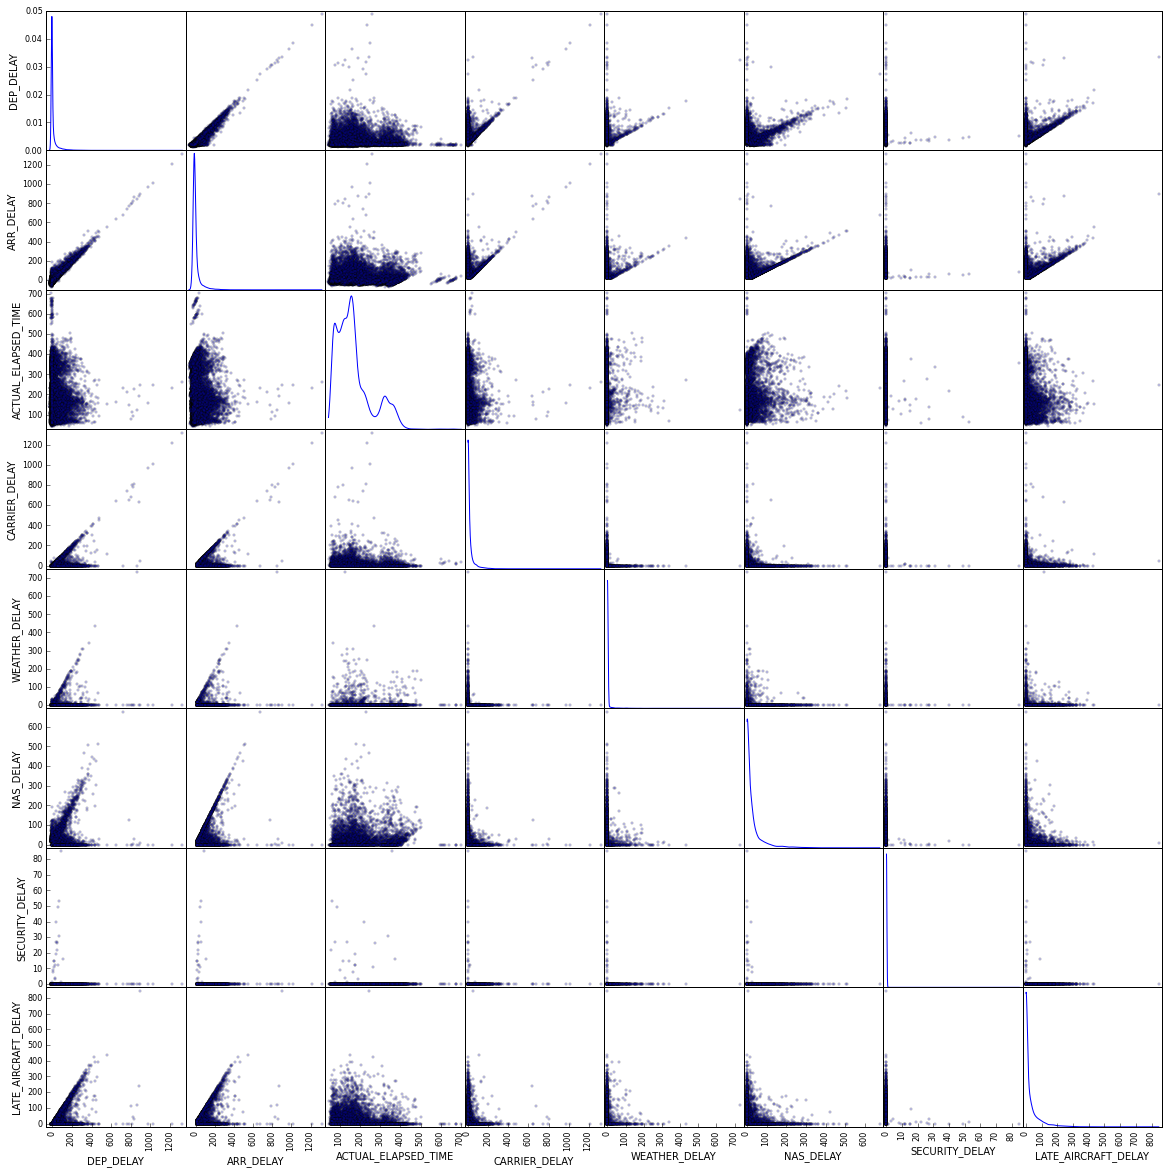

In [12]:
scatter_matrix(df[[ u'DEP_DELAY', u'ARR_DELAY', u'ACTUAL_ELAPSED_TIME',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY']],alpha=0.2, figsize=(20, 20), diagonal='kde')

In [13]:
lr = LinearRegression()

In [29]:
data = np.asarray(df[['DEP_DELAY','LATE_AIRCRAFT_DELAY','CARRIER_DELAY','NAS_DELAY']].fillna(0)) #convert the dataframe to a nparray
# pandas.DataFrame.fillna:
# Fill NA/NaN values using the specified method
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
x, y = data[:, 1:], data[:, 0] #assign the values to variables and reshape the data

In [30]:
lr.fit(x,y) #fit the data to the values

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [16]:
m = lr.coef_ #slope

In [17]:
m

array([ 1.07649627,  1.03713069,  0.84402415])

In [18]:
b = lr.intercept_ #intercept

In [19]:
b

-1.0086983381902872

In [20]:
lr.score(x,y)

0.87595697846760023